In [2]:
import QSTK.qstkutil.qsdateutil as du
import QSTK.qstkutil.tsutil as tsu
import QSTK.qstkutil.DataAccess as da
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

C:\Anaconda32\lib\site-packages\QSTK\qstkutil\qsdateutil.py:36: FutureWarning: TimeSeries is deprecated. Please use Series
  return pd.TimeSeries(index=dates, data=dates)


In [4]:
ls_port_syms = ['AAPL', 'GLD', 'GOOG', 'XOM']
lf_port_alloc = [0.4, 0.4, 0.0, 0.2]
c_dataobj = da.DataAccess('Yahoo')
ls_all_syms = c_dataobj.get_all_symbols()
ls_bad_syms = list(set(ls_port_syms) - set(ls_all_syms))


if len(ls_bad_syms) != 0:
        print "Portfolio contains bad symbols : ", ls_bad_syms
        
for s_sym in ls_bad_syms:
    i_index = ls_port_syms.index(s_sym)
    ls_port_syms.pop(i_index)
    lf_port_alloc.pop(i_index)

In [5]:
dt_end = dt.datetime(2011, 12, 31)
dt_start = dt.datetime(2011, 1, 1)  # Three years
dt_timeofday = dt.timedelta(hours=16)

ldt_timestamps = du.getNYSEdays(dt_start, dt_end, dt_timeofday)

ls_keys = ['open', 'high', 'low', 'close', 'volume', 'actual_close']

ldf_data = c_dataobj.get_data(ldt_timestamps, ls_port_syms+["$SPX"], ls_keys)
d_data = dict(zip(ls_keys, ldf_data))

In [6]:
df_rets = d_data['close'].copy()
df_rets = df_rets.fillna(method='ffill')
df_rets = df_rets.fillna(method='bfill')

na_rets = df_rets.values[:,:len(ls_port_syms)]
spx_rets = df_rets.values[:,-1]
na_rets = na_rets/na_rets[0]
spx_rets = spx_rets/spx_rets[0]

In [10]:
type(d_data['close'])

pandas.core.frame.DataFrame

In [5]:
port_val = na_rets.sum(axis=1)
port_ret = tsu.returnize0(port_val)
port_total = np.cumprod(port_ret + 1)
port_ret_std = port_ret.std()
port_ret_avg = port_ret.mean()
port_sharpe = np.sqrt(252)*port_ret_avg/port_ret_std

print port_sharpe


0.844266842777


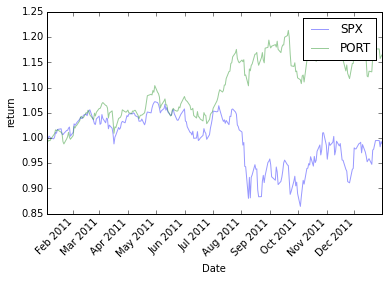

In [142]:
plt.clf()
fig = plt.figure()
fig.add_subplot(111)
plt.plot(ldt_timestamps, zip(spx_rets,port_total), alpha=0.4)
plt.legend(["SPX", "PORT"])
plt.ylabel('return')
plt.xlabel('Date')
fig.autofmt_xdate(rotation=45)

2011-01-01
2011-12-31
Symbols: ['AAPL', 'GLD', 'GOOG', 'XOM']
Optimal Allocation: [ 0.4  0.4  0.   0.2]
Volatility (stdev of daily returns): 0.0101467067654
Average Daily Return: 0.000657261102001
Sharpe Ratio: 1.02828403099
Cumulative Return: 1.16487261965


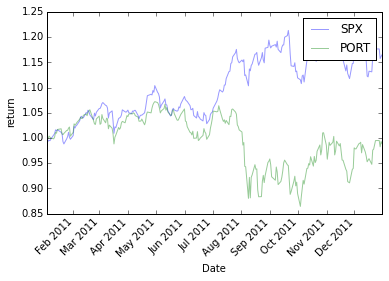

In [143]:
%run ass1.py 2011 1 1 2011 12 31 AAPL GLD GOOG XOM

In [135]:
na_rets.shape

(252, 4)